# 최적화 : 출력이 최대 or 최소 되는 입력변수 찾기.
- 최적화 문제의 대상이 되는 함수를 '목적함수'라 부른다. 
- 목적함수에는 손실함수, 성능함수 등이 있다. 
- $f(x)$에 대해 최소화 문제 풀 수 있으면, $-f(x)$ 해서 최소화 문제 풀면 $f(x)$의 최대화 문제 푼 것과 같다. 
- 따라서 보통은 최적화 한다고 하면 '최소해 찾기'를 말한다.


- $f(x)$는 성능함수
$x^{*} = argmax_{x}f(x)$ 

- $f(x)$는 손실함수
$x^{*} = argmin_{x}f(x)$


예) 1차원 목적함수 최적해는? 

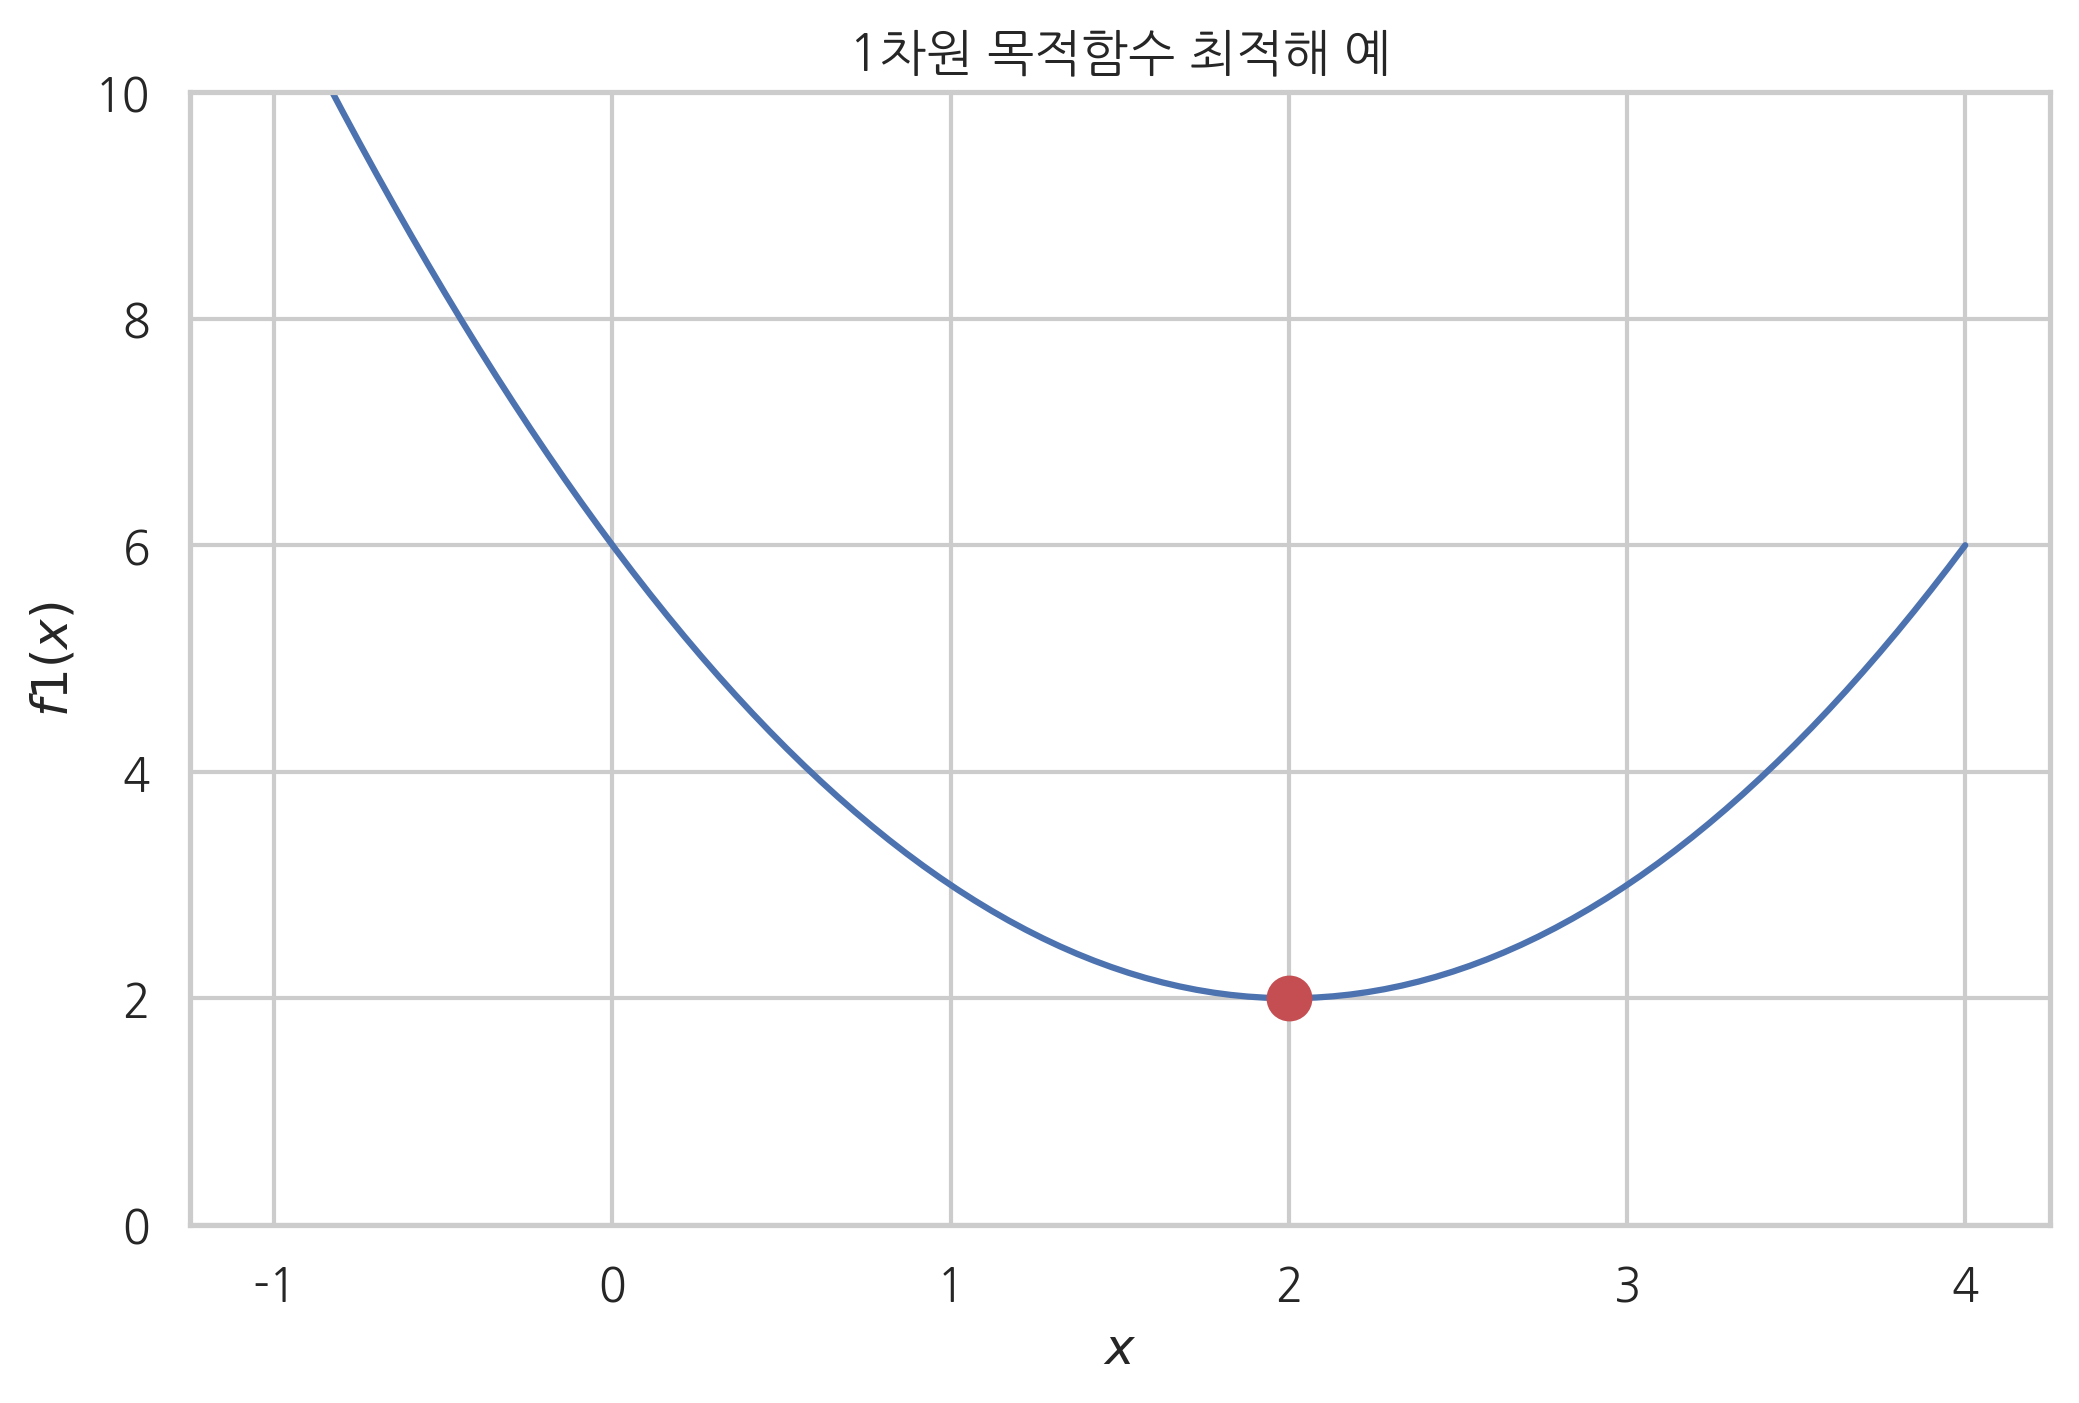

In [1]:
def f1(x) : 
    return (x-2)**2+2

xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2,2, 'ro', markersize=10)
plt.ylim(0, 10)
plt.xlabel('$x$')
plt.ylabel('$f1(x)$')
plt.title('1차원 목적함수 최적해 예')
plt.show()

## x 입력 2가 최적해, y 값 2가 최소 출력이다. 

### 2차원 로젠브록함수의 예 : 3차원 지형에서 고도 제일 낮은 지점 찾기 

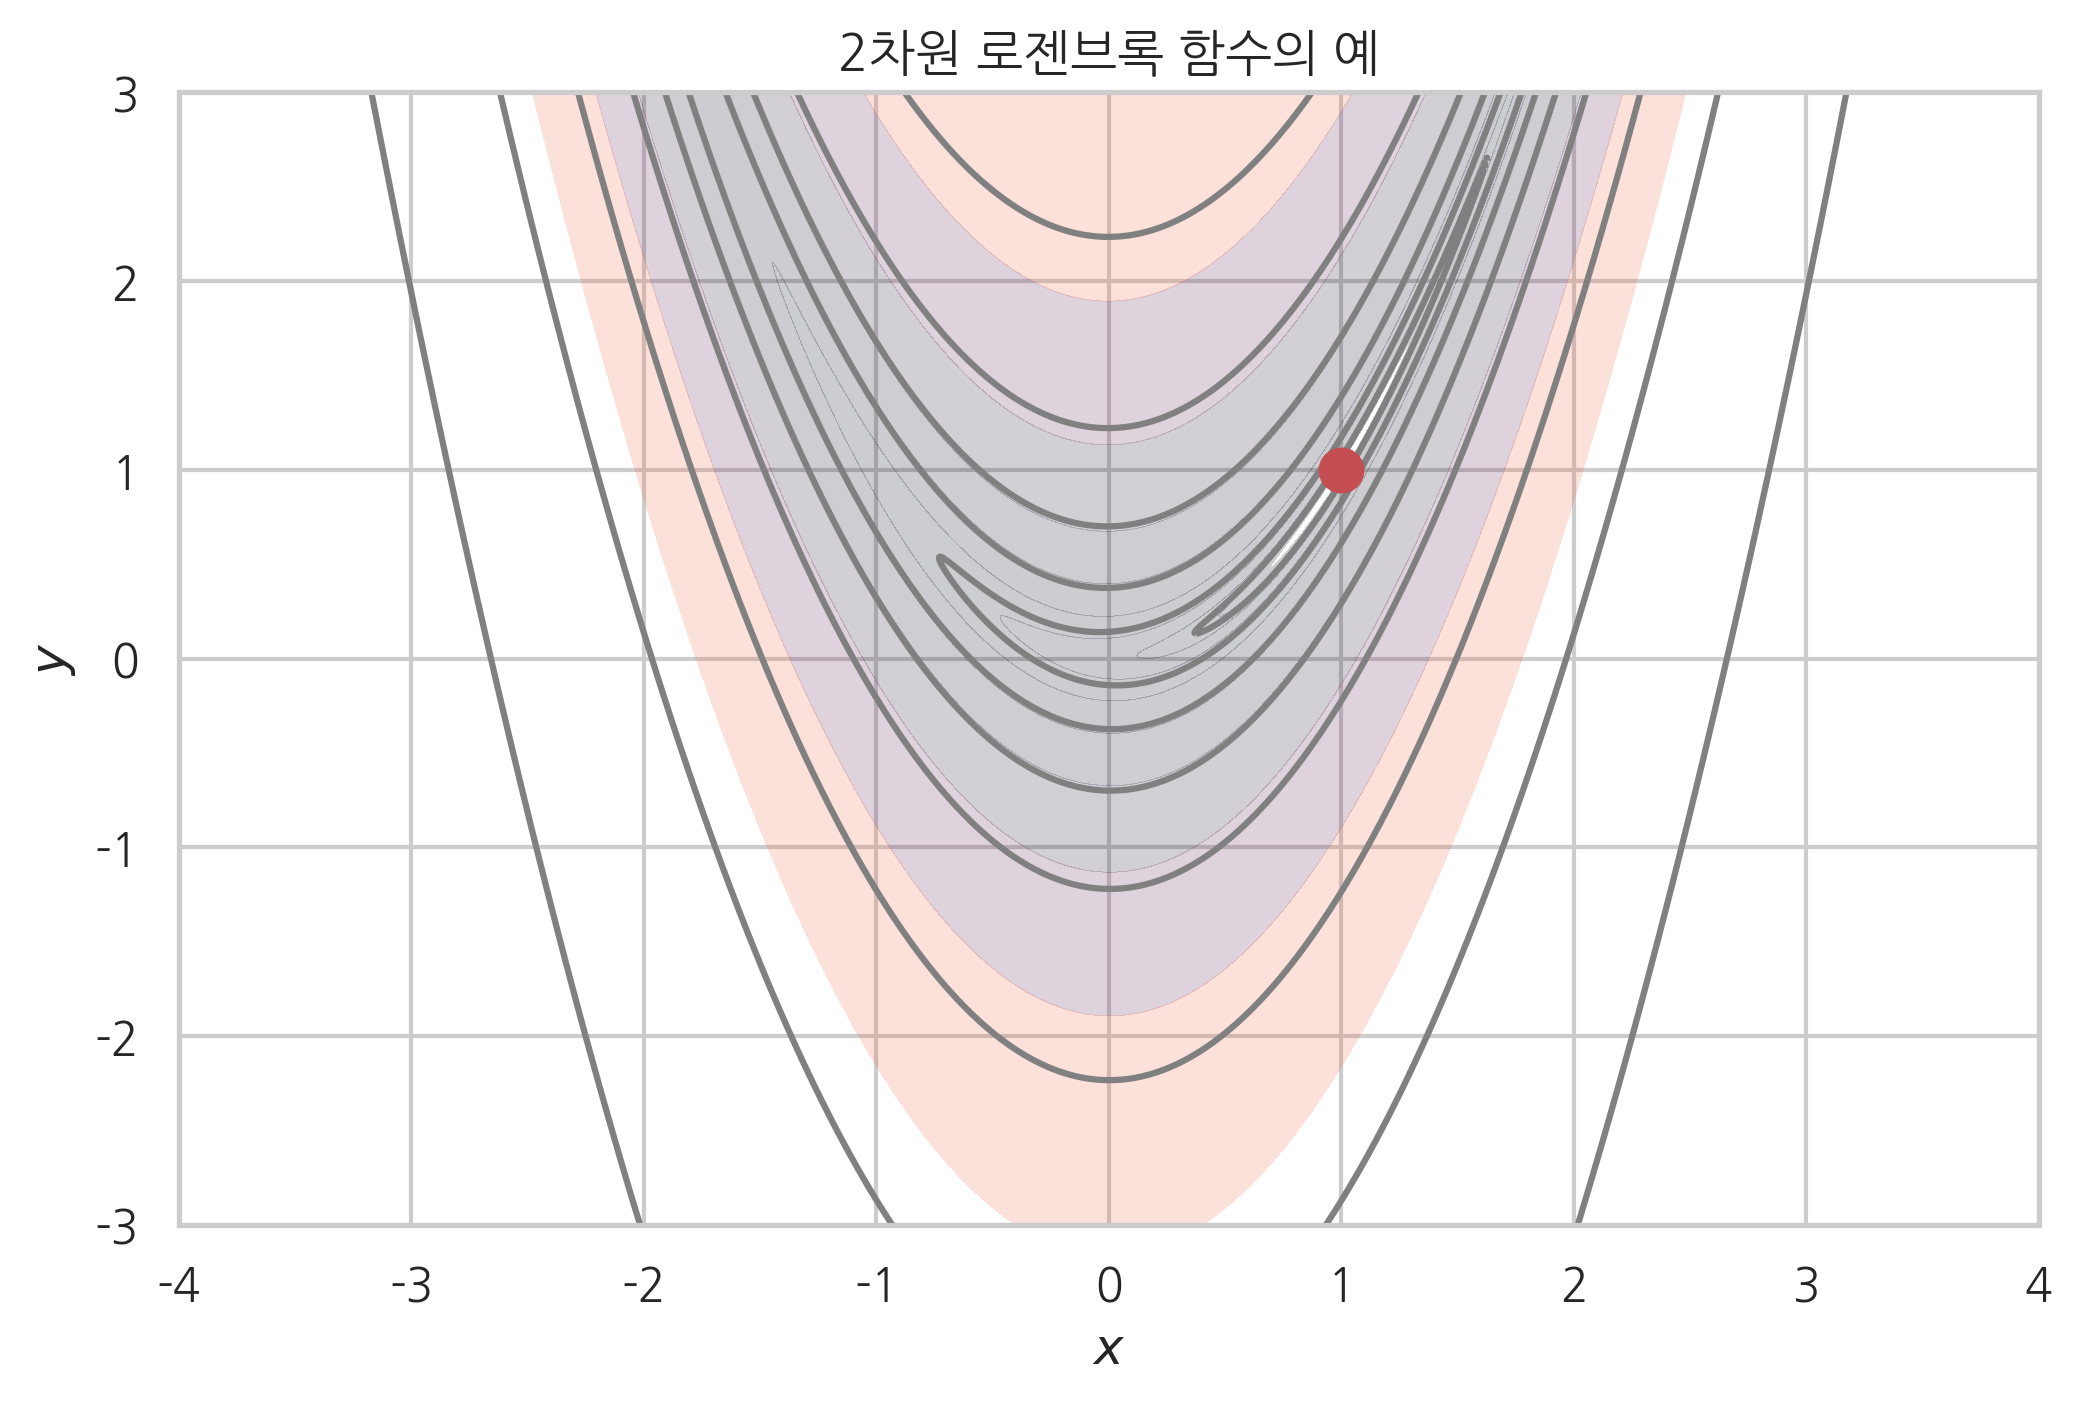

In [2]:
def f2(x, y) : 
    return (1-x)**2 + 100.0*(y-x**2)**2

xx = np.linspace(-4,4,800)
yy = np.linspace(-3,3,600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2,levels=levels) #alpha값은 색 농도, levels는 얼마만큼 크기로 나타낼 건지
plt.contour(X, Y, Z, colors='gray', #색으로 나타낸 그래프 위에 중첩가능
           levels=[0.4, 3, 15, 50, 150,500,1500, 5000])
plt.plot(1,1, 'ro', markersize=10) #(1,1) 지점이 최저고도 - 빨간색 점 찍기

plt.xlim(-4,4)
plt.ylim(-3,3)
plt.xticks(np.linspace(-4,4, 9))
plt.yticks(np.linspace(-3,3, 7))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('2차원 로젠브록 함수의 예')
plt.show()

# 최적화 방법 : 

# 그리드 서치 <노가다>
- 입력변수 후보군 추려서 직접 함수 넣어보자! 
- 입력변수 너무 많아지면 비효율적이다. (언제 일일이 다 넣어보냐?)

# 수치적 최적화 <노가다는 맞는데, 좀 더 효율적으로 하자>
- '최소 시도 횟수'로 최적화 성공 하는 게 목표.

# 수치적 최적화에 필요한 두 가지 알고리듬
1. 지금 위치가 최적점인가? 확인하는 알고리듬
2. 다음 위치는 어디로 옮길 것인가? 결정하는 알고리듬 
- 수치적 최적화에서는 '기울기 필요조건'을 최적화 필요조건으로 쓴다. 
- 기울기 필요조건 충족(기울기=0) & 2차 도함수 양수 --> 최소해 

# 최대경사법 
- 다음 위치 정하는 알고리듬 : $x_{k+1} = x_{k}-\mu f'(x_{k})$
- 초깃값 투입 --> 그 위치에서 기울기 필요조건 0인가? --> 다음 위치로 변경 --> 기울기 필요조건 확인 --> 반복 

1차 시도 : x_1 = 0, g = -4
2차 시도 : x_2 = 1.6, g= -0.7999999999999998
3차 시도 : x_3 = 1.92, g=-0.16000000000000014


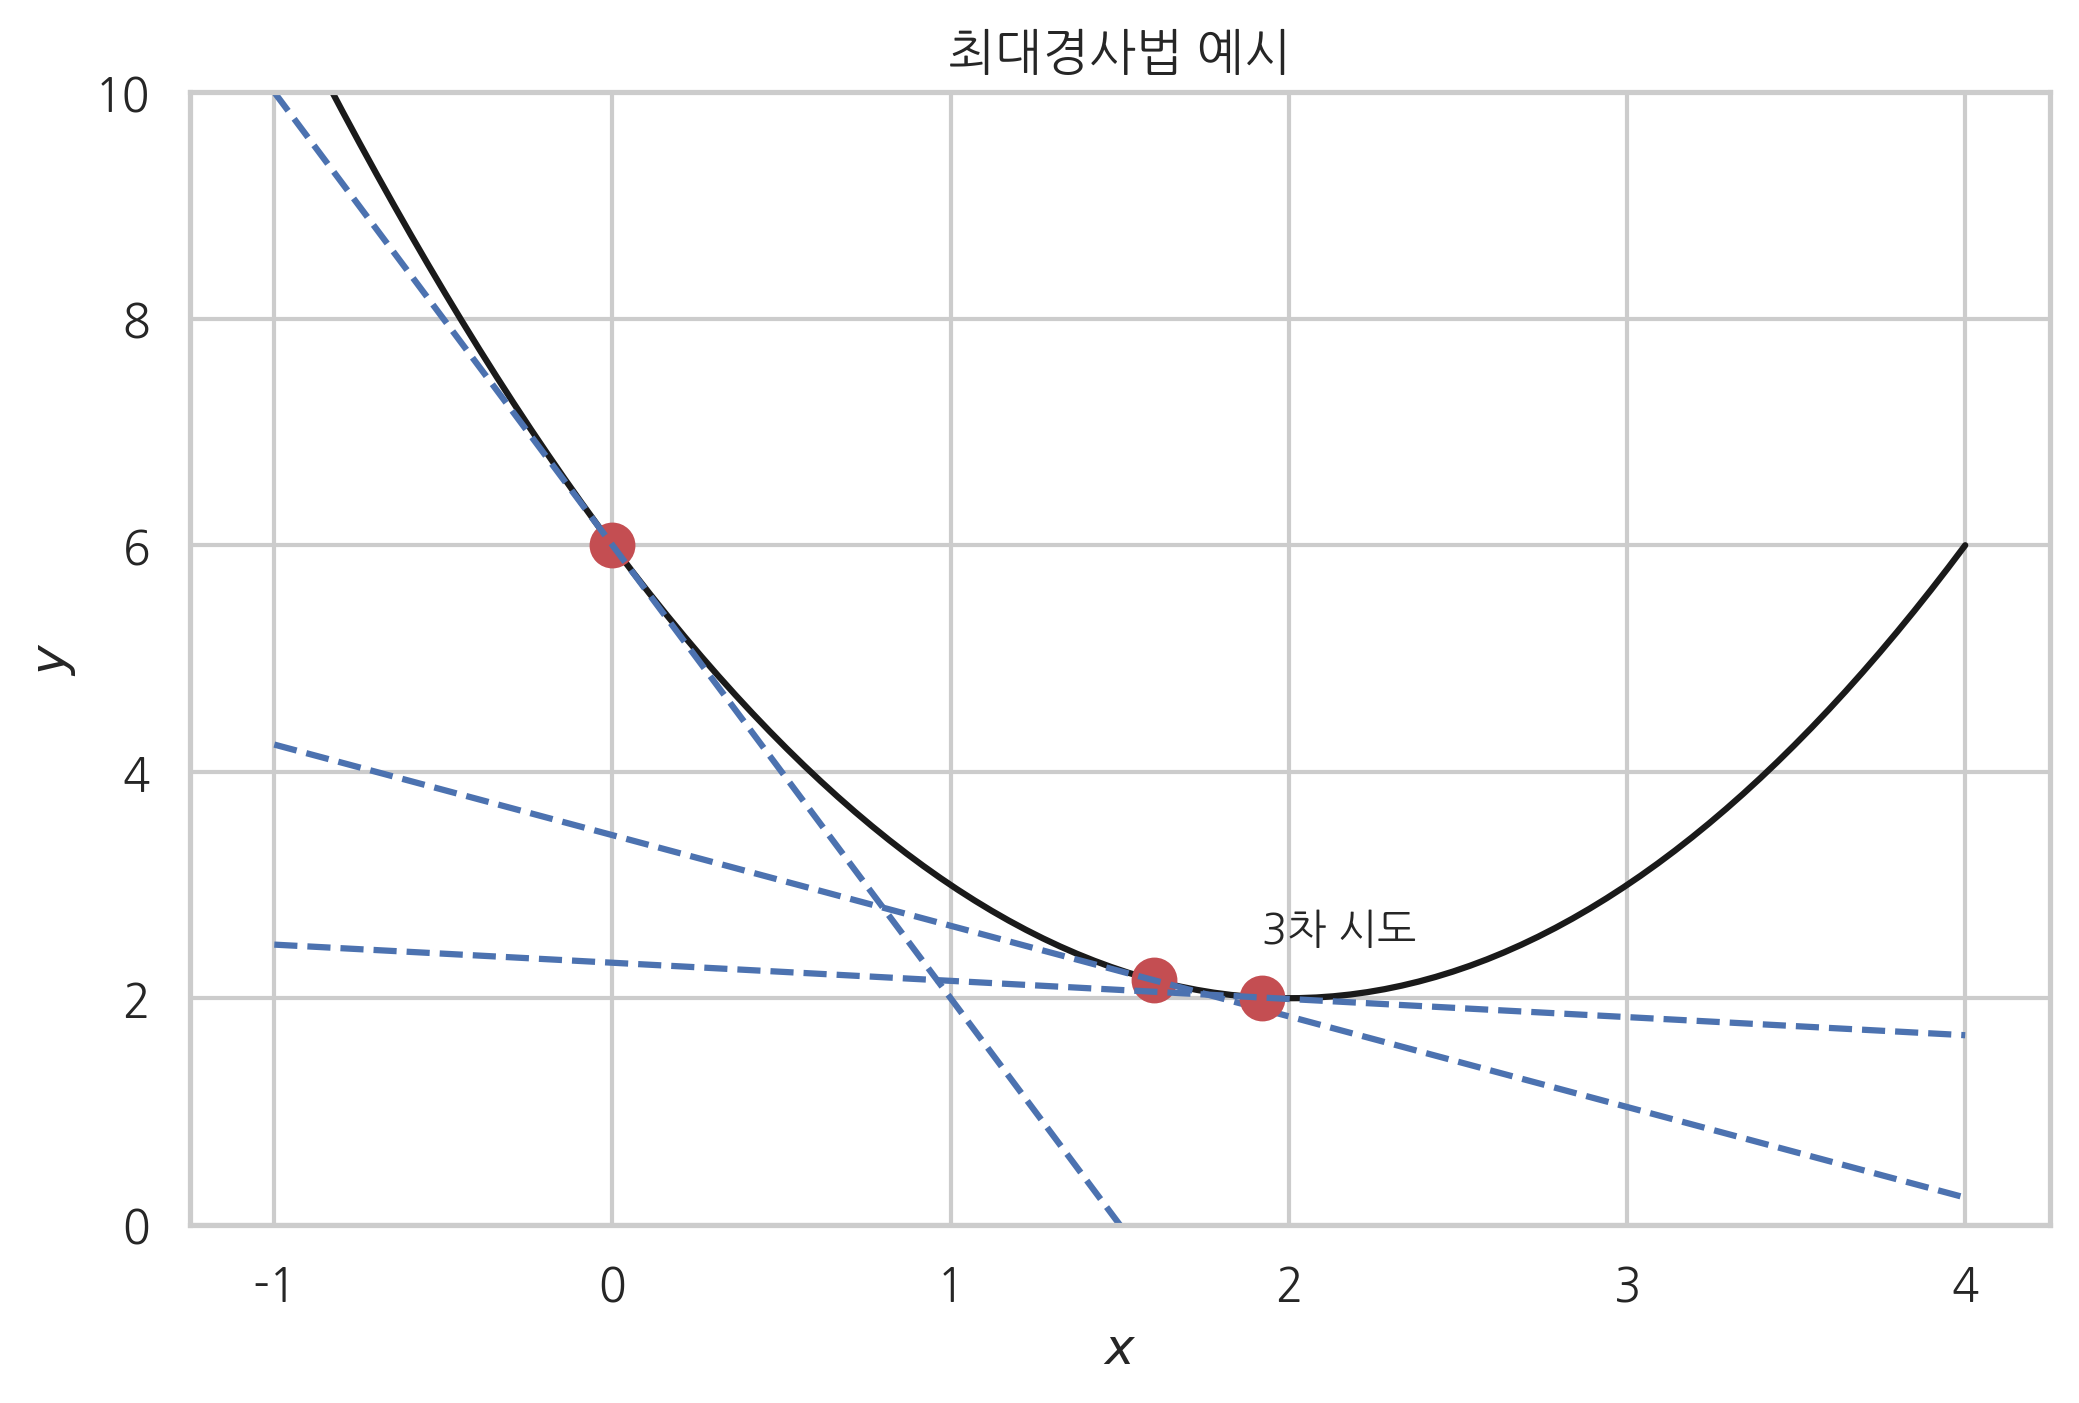

In [3]:
def f1d(x) : 
    return 2*x-4 # 1차 도함수 

xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx), 'k-')

# step size 
mu = 0.4

#1번째 시도 
x = 0 
plt.plot(x, f1(x), 'ro', markersize=10)
plt.plot(xx, f1d(x)*(xx-x)+f1(x), 'b--' )
print(f'1차 시도 : x_1 = {x}, g = {f1d(x)}')

#2번째 시도 
x = x-mu*f1d(x)
plt.plot(x, f1(x), 'ro', markersize=10)
plt.plot(xx, f1d(x)*(xx-x)+f1(x), 'b--')
print(f'2차 시도 : x_2 = {x}, g= {f1d(x)}')

#3번째 시도
x = x-mu*f1d(x)
plt.plot(x, f1(x), 'ro', markersize=10)
plt.plot(xx, f1d(x)*(xx-x)+f1(x), 'b--')
plt.text(x, f1(x)+0.5, '3차 시도')
print(f'3차 시도 : x_3 = {x}, g={f1d(x)}')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('최대경사법 예시')
plt.ylim(0, 10)
plt.show()

# 2차원 로젠브록 함수에 최대경사법 적용하기 

초기 위치 -1 -1


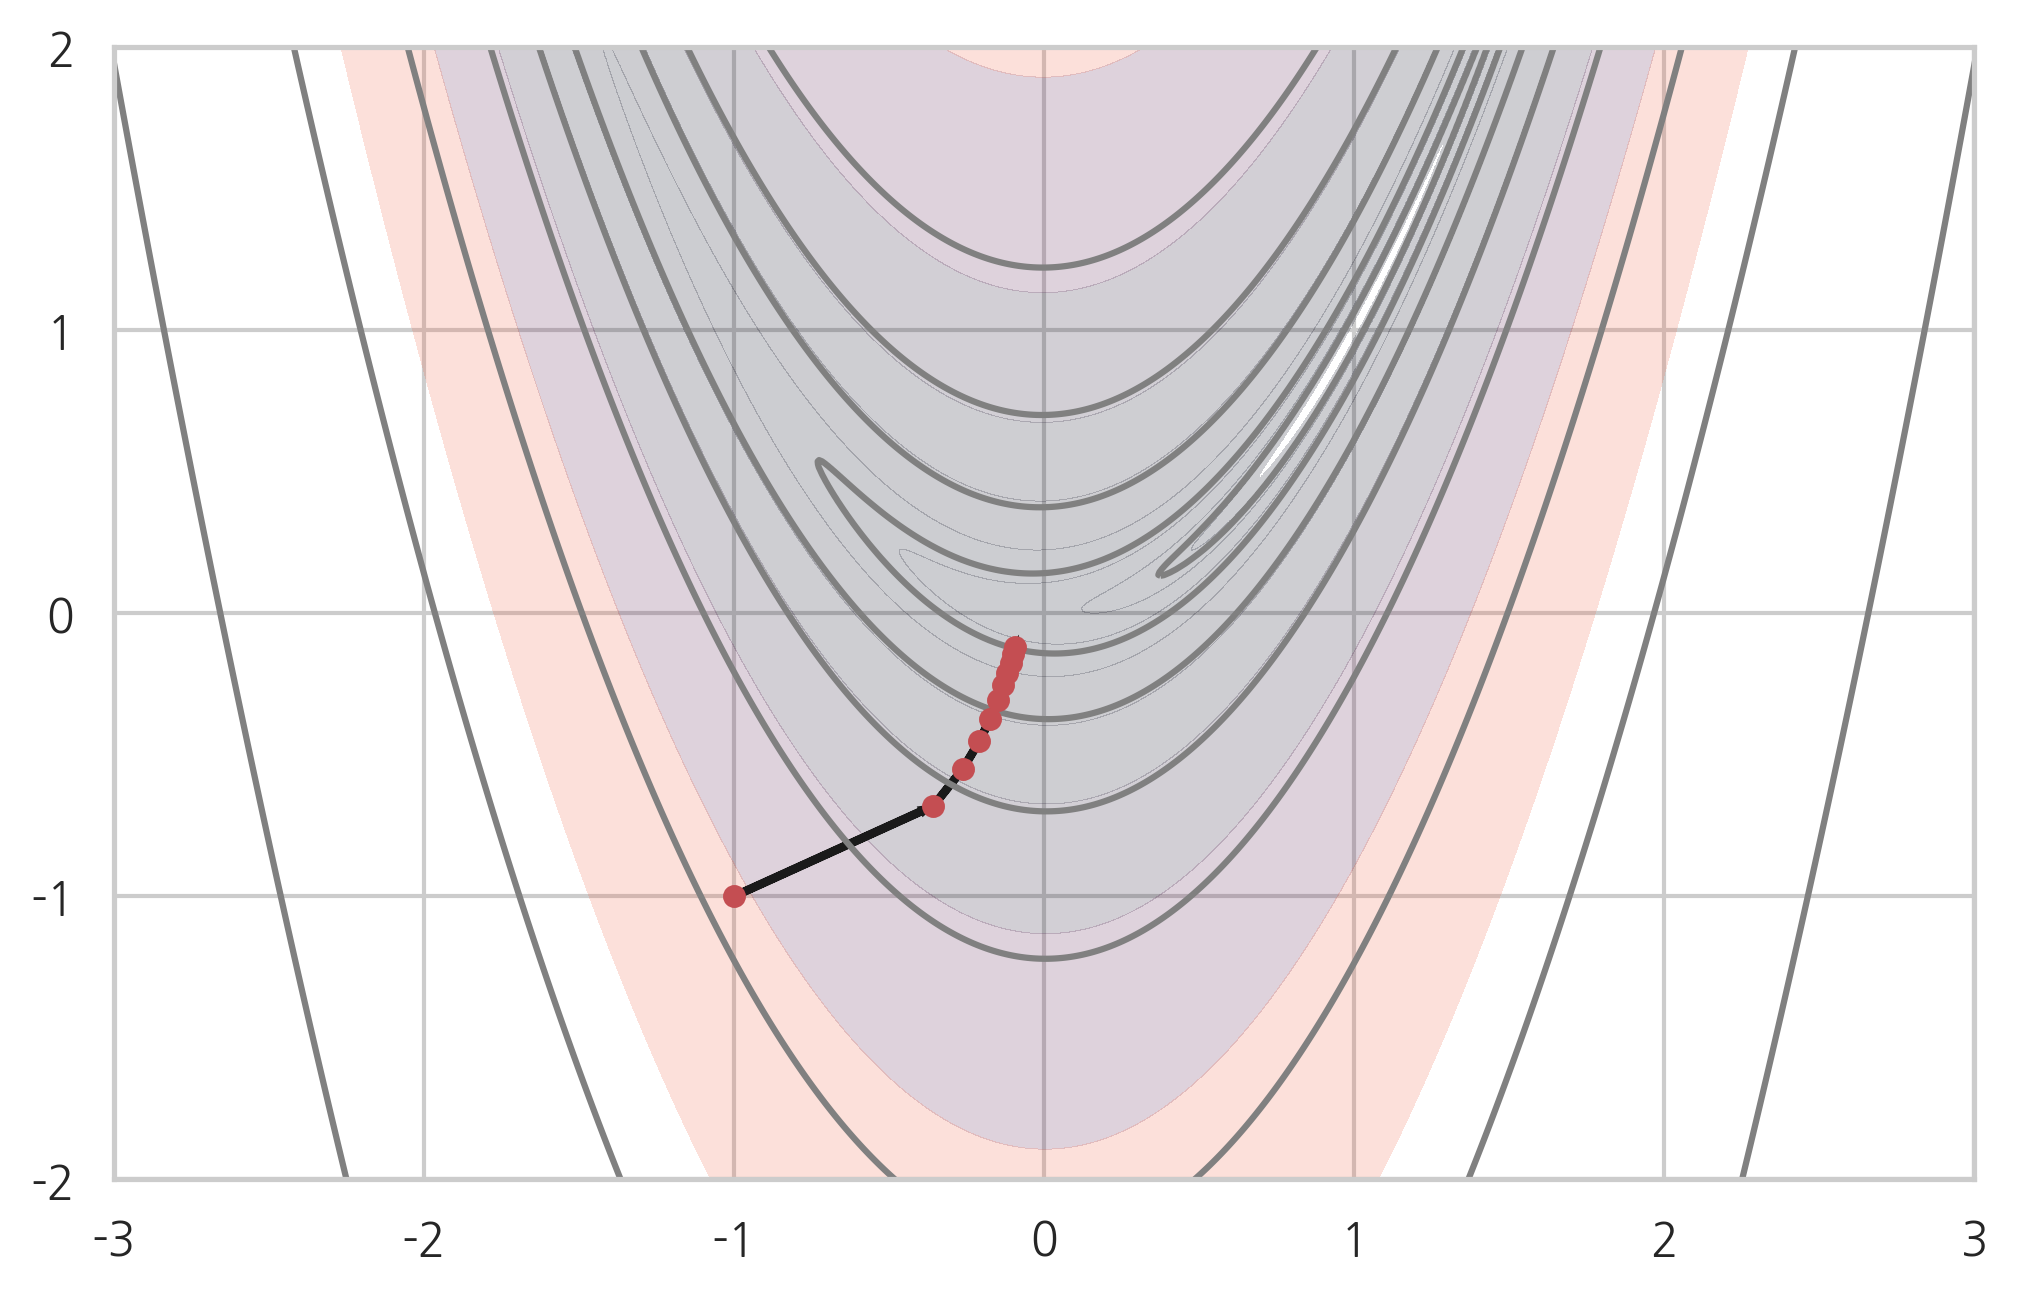

해당위치 그레디언트 벡터 값 [ -8.404136   -31.10131365]


In [4]:
xx = np.linspace(-4,4,800)
yy = np.linspace(-3,3,600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2,levels=levels) #alpha값은 색 농도, levels는 얼마만큼 크기로 나타낼 건지
plt.contour(X, Y, Z, colors='gray', #색으로 나타낸 그래프 위에 중첩가능
           levels=[0.4, 3, 15, 50, 150,500,1500, 5000])


def f2g(x, y) : 
    return np.array((2.0*(x-1)-400.0*x*(y-x**2), 200*(y-x**2))) # 그레디언트 벡터 

mu = 8e-4
s = 0.95

x, y = -1, -1 #초깃값
print('초기 위치', x,y)
plt.plot(x, y, 'ro', markersize=4.5)

for i in range(10) : 
    g = f2g(x, y) 
    plt.arrow(x, y,  -0.95*mu*g[0], -0.95*mu*g[1],
             fc='k', ec='k', lw=2)
    x = x-mu*g[0]
    y = y-mu*g[1]
    plt.plot(x, y, 'ro', markersize=4.5)
    
plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xticks(np.linspace(-3, 3, 7))
plt.yticks(np.linspace(-2,2,5))
plt.show()
print('해당위치 그레디언트 벡터 값', g)

# 관심사 : 어느 위치에서 기울기 가장 작아지는가(0이 되는가)
### 그레디언트 벡터 방향은 기울기 가장 큰 곳 가리키고, 
### 그레디언트 벡터 길이는 그 점에서 기울기 보여준다.
- 내 관심사는 기울기 가장 작아지는 지점(최저점) 찾는 것이다.
- 3차원 지형 기준으로, 기울기 0되는 지점이 최저점이다. 

### 각 지점에서의 기울기 크기는 지금 필요 없다. 
### 그레디언트 벡터 방향만 활용해서 최저점 표현하자. 
- 기울기 크기는 상관 없으니 그레디언트 벡터 길이는 조작 가능하다(조작해도 코사인 유사도가 1이어서, 방향은 같은 벡터다)
- 따라서 그레디언트 벡터는 크기가 줄거나 늘어도 여전히 기울기 가장 큰 지점 가리킨다.
### 그렇다면, 벡터 방향을 반대로 하면? 
- 그레디언트 벡터가 (그 점 기준) 기울기 가장 작은 지점(최저점) 방향을 가리킬 것이다. 

# 최대경사법 _ '진동현상' 발생하는 경우 

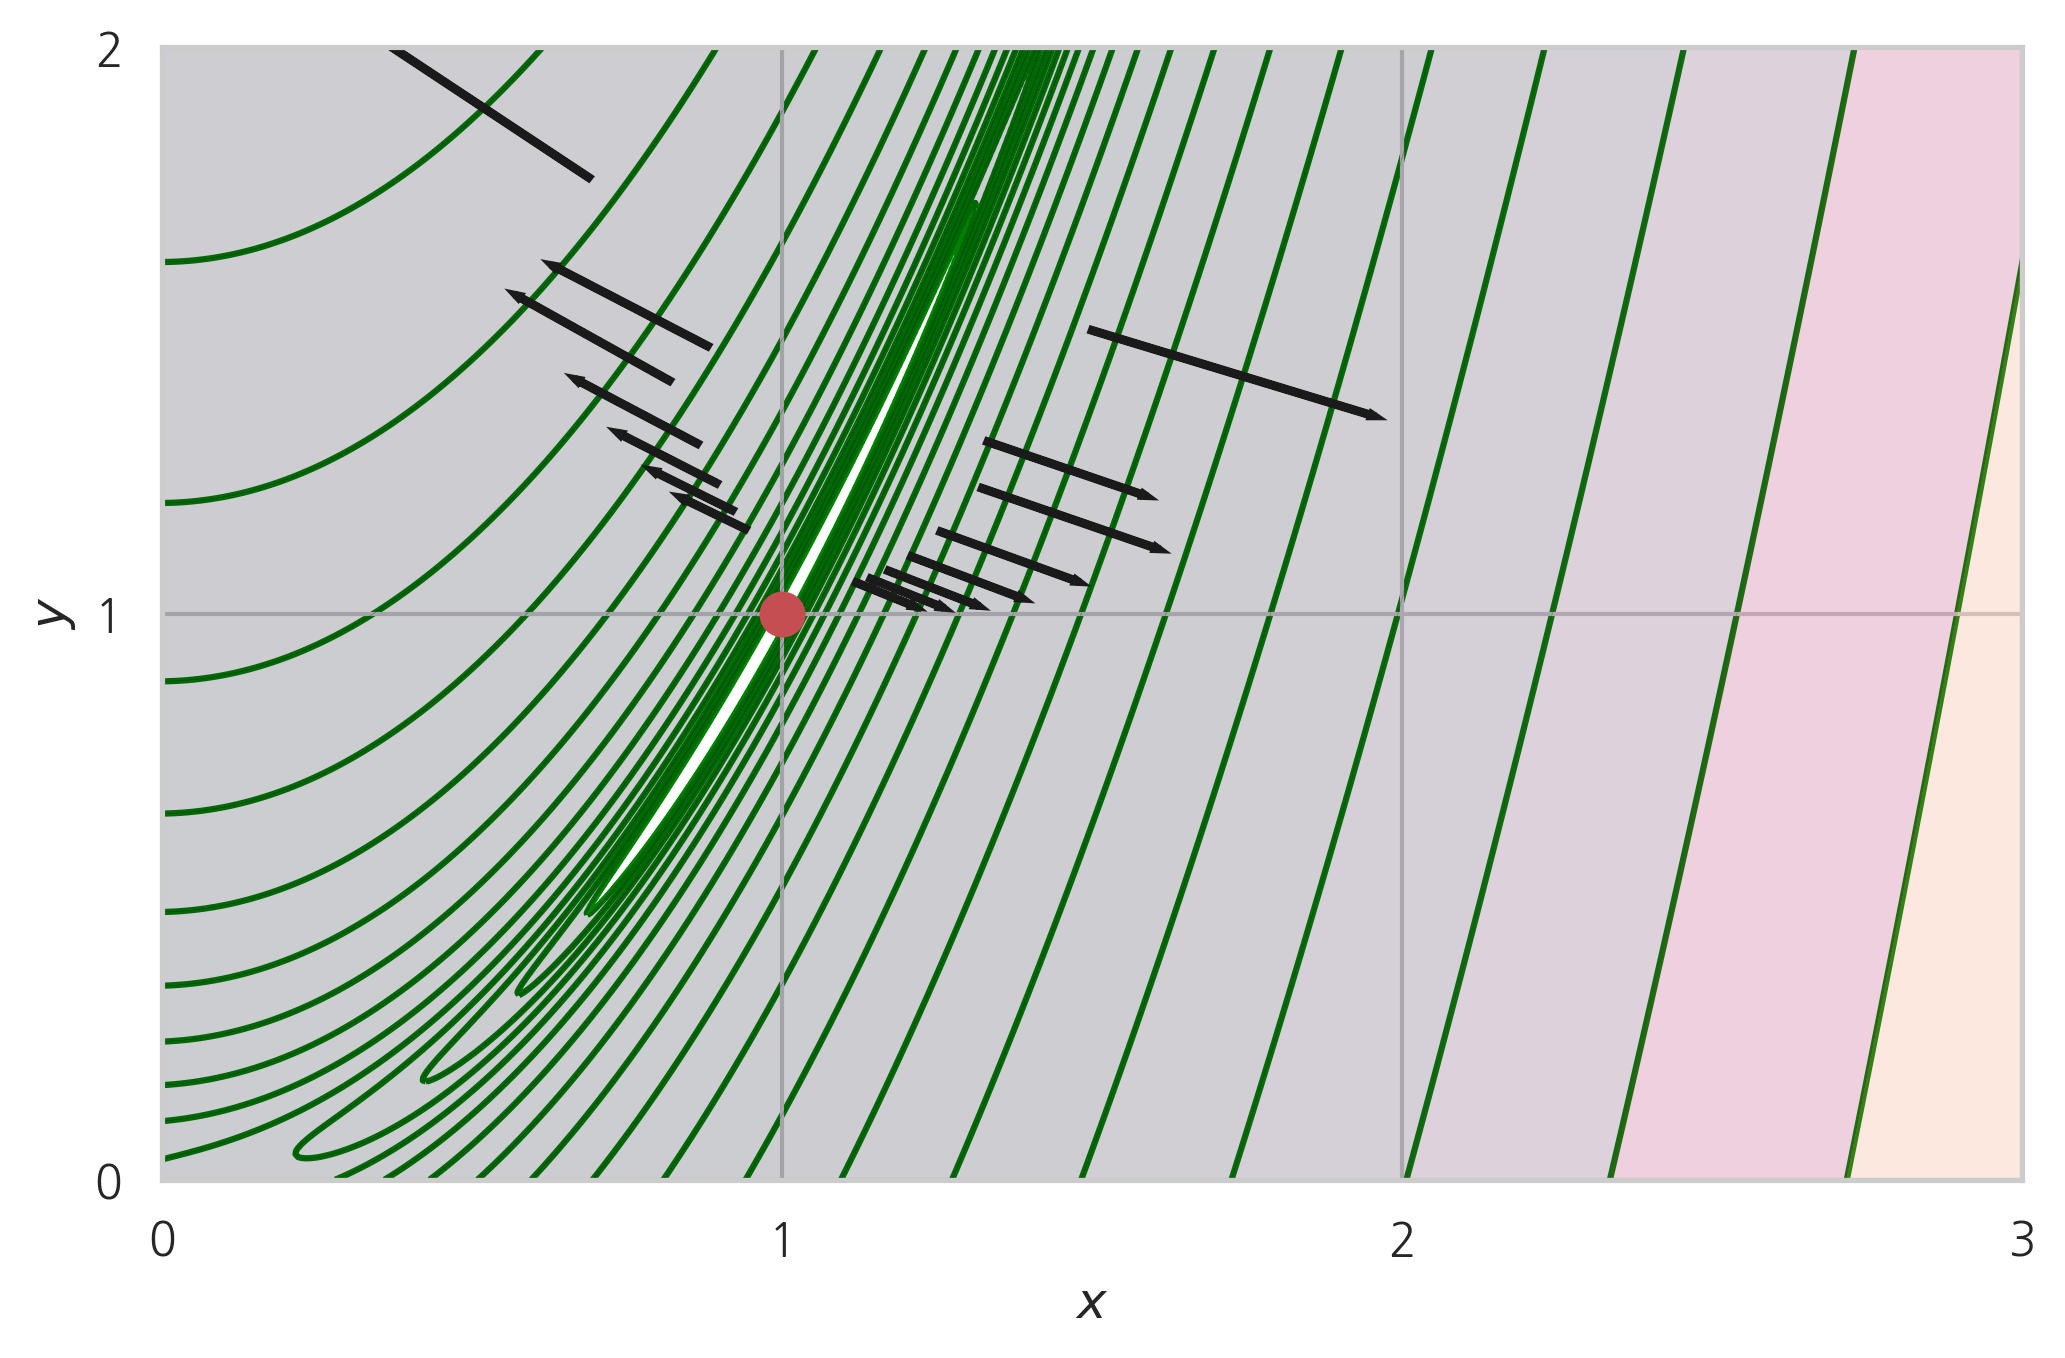

In [5]:
xx = np.linspace(0, 4, 800)
yy = np.linspace(0, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 4, 20)

plt.contourf(X, Y, Z, alpha = 0.2, levels=levels)
plt.contour(X, Y, Z, colors='green', levels=levels, zorder=0)
plt.plot(1,1,'ro', markersize=10)
mu = 1.8e-3
s = 0.95

x, y = 1.5, 1.5
for i in range(15) : 
    g = f2g(x,y)
    plt.arrow(x, y, 0.001*g[0], 0.001*g[1],
             fc='k', ec='k', lw=2)
    x = x-mu*g[0]
    y = y-mu*g[1]
    
plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xticks(np.linspace(0, 3, 4))
plt.yticks(np.linspace(0, 2, 3))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

# 기울기 가장 큰. 그러니까 지형 가장 가파른 방향(계곡 위)로 그레디언트벡터 모두 향하고 있다

# 그레디언트 벡터 방향 바꿔서, 최저점 가리키게 하자.
- 물론 이 경우에는 그래프 모양 때문에 진동현상이 생겨서, 그레디언트 벡터가 전역 최저점 가리키지 않을 것이다.

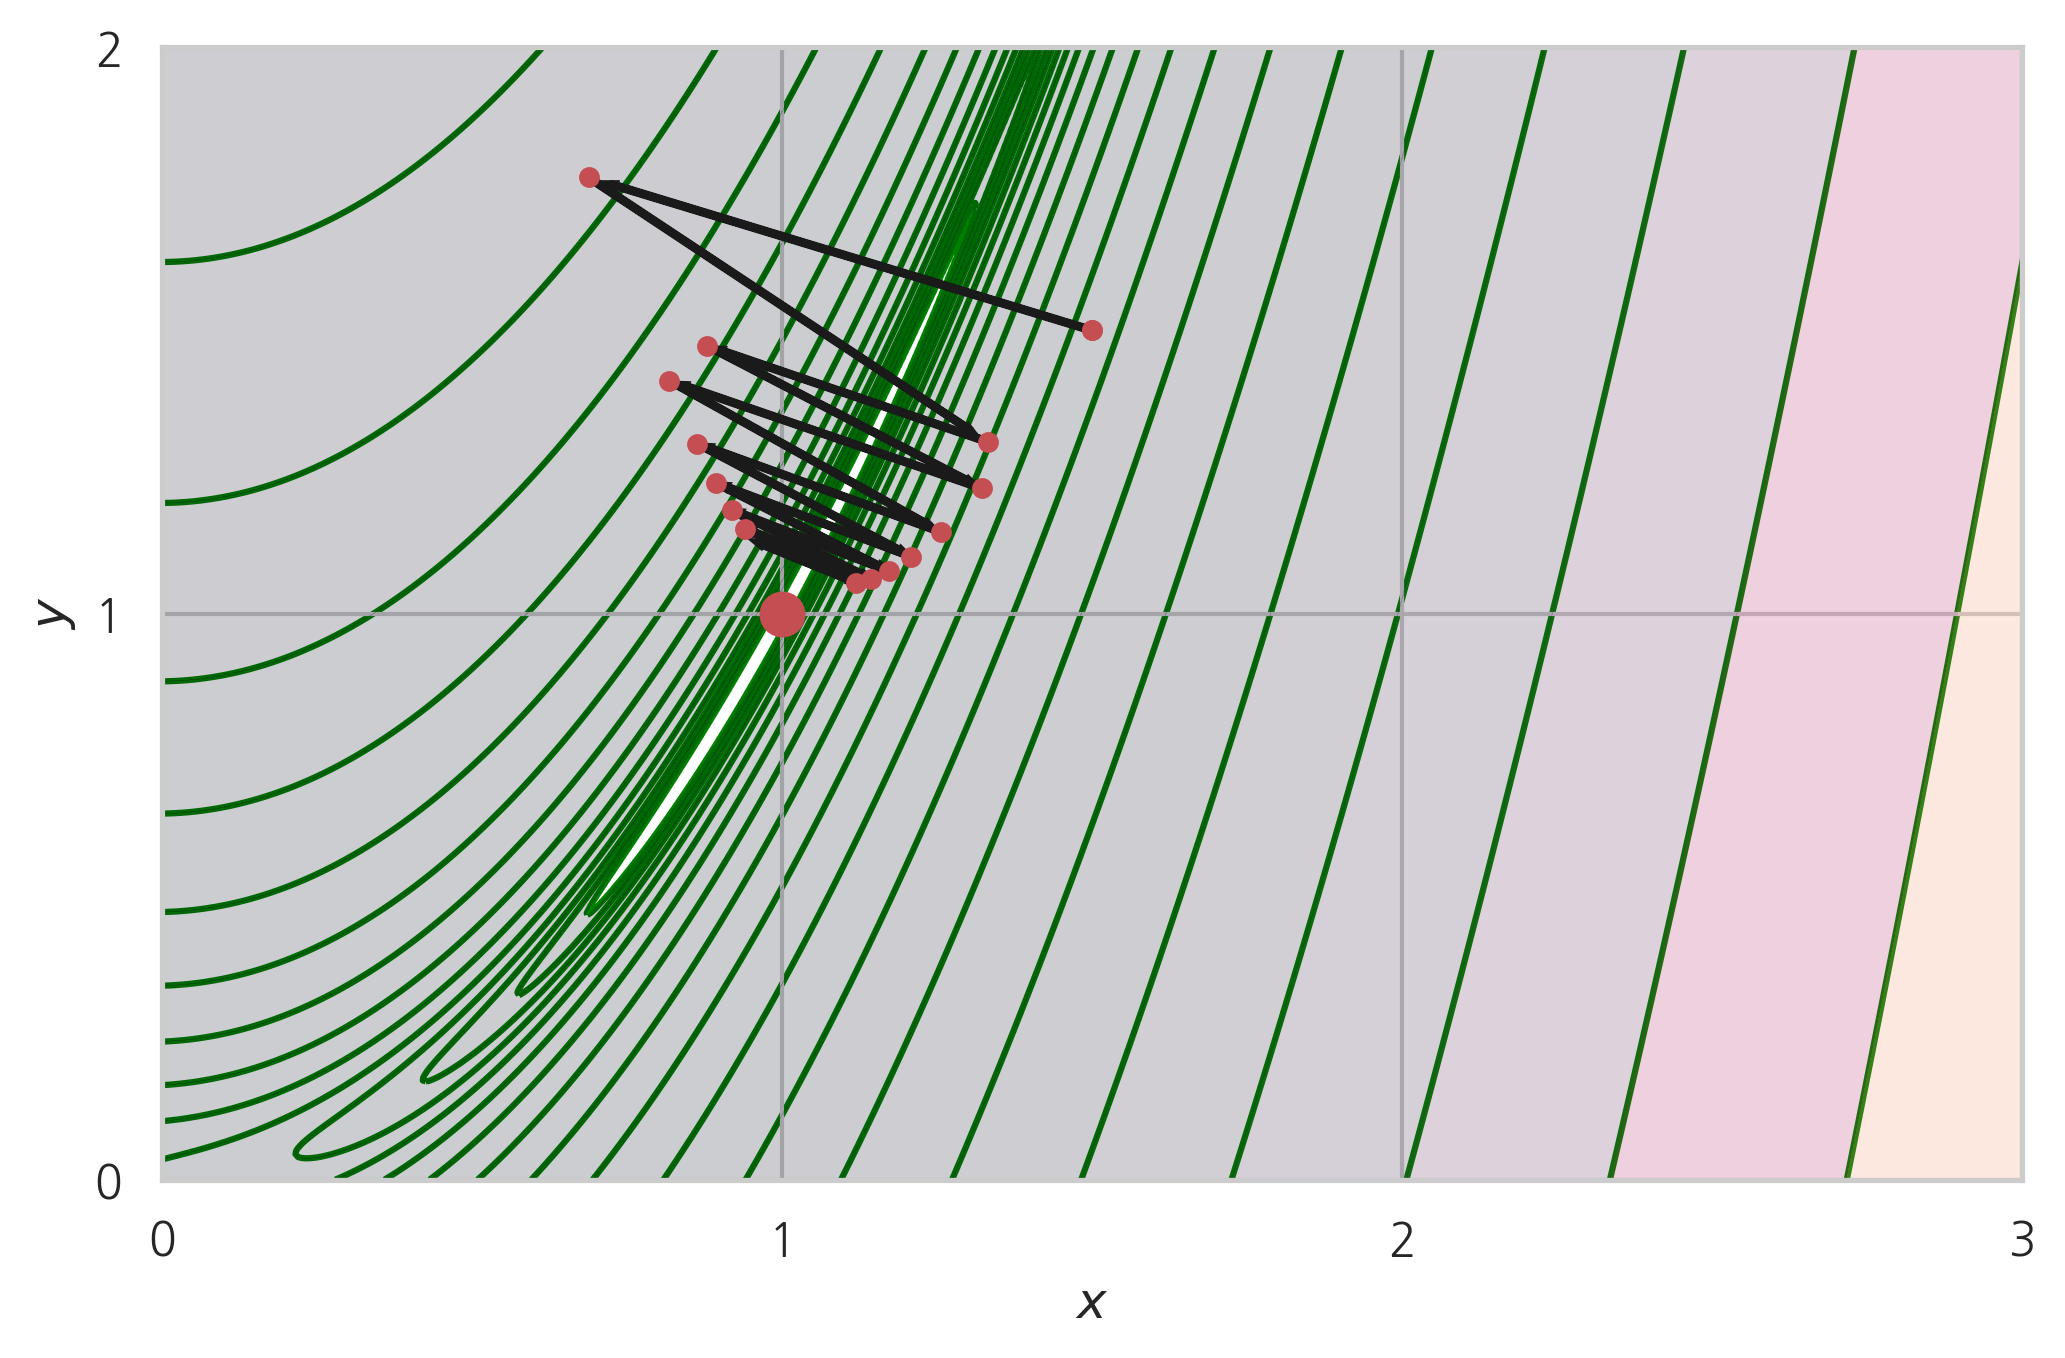

In [6]:
xx = np.linspace(0, 4, 800)
yy = np.linspace(0, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 4, 20)

plt.contourf(X, Y, Z, alpha = 0.2, levels=levels)
plt.contour(X, Y, Z, colors='green', levels=levels, zorder=0)
plt.plot(1,1,'ro', markersize=10)
mu = 1.8e-3
s = 0.95

x, y = 1.5, 1.5
plt.plot(x, y, 'ro', markersize=4)
for i in range(15) : 
    g = f2g(x,y)
    plt.arrow(x, y, -s*mu*g[0], -s*mu*g[1],
             fc='k', ec='k', lw=2)
    plt.plot(x, y, 'ro', markersize=4)
    x = x-mu*g[0]
    y = y-mu*g[1]
    
plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xticks(np.linspace(0, 3, 4))
plt.yticks(np.linspace(0, 2, 3))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

# 조작된 그레디언트 벡터 방향은 기울기 가장 작은 지점을 가리킨다.
# 최대 경사법은 기울기 줄어드는 방향으로 이동한다. 
### 위 그림은 다음과 같다. 
- 조작된 그레디언트 벡터 방향대로, 기울기 줄어드는 방향으로 이동할 건데. mu 크기만큼만 이동한 것이다. 
- 지그재그 따라가면서 기울기가 계속 줄어든다 --> 0으로 수렴(최저점 도착)
# 최적점 찾기까지 시간 많이 걸린다!!

# 정리 : 내가 이번에 배운 최적화 방법은 모두 '최대경사법'에 근간을 두고 있다. 
## 뉴턴방법. 준 뉴턴방법 모두 최대경사법 변형. 개선한 것이다.
# 최대경사법 핵심은 기울기 줄어드는 방향으로 입력 위치 이동해가며 최적해 찾는 것이다.


# 준 뉴턴방법 - BFGS방법으로 최적화 하기 
- 사람이 직접 헤시안 행렬 함수 안 구해도 된다는 장점. 
- 2차 도함수(헤시안 행렬 함수) 근삿값을 구해서 쓴다. 

In [8]:
import scipy as sp

def f1(x) : 
    return (x-2)**2+2

x0 = 0 #초깃값
result = sp.optimize.minimize(f1, x0)
result

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])

최적화 성공

# 계산량 줄이려면 직접 그레디언트 벡터 함수 만들어서 jac 인수로 넣어주면 된다. 

In [20]:
import sympy
x = sympy.symbols('x')
sympy.diff(f1(x), x)

2*x - 4

In [23]:
def f1p(x) : 
    return 2*x-4

result2 = sp.optimize.minimize(f1, x0, jac=f1p)
result2

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])

- 그레디언트벡터 함수 직접 넣어줘서 함수 호출횟수(계산횟수)를 줄였다. 

In [26]:
# 다변수함수를 BFGS방법으로 최적화 하는 경우 
def f2(x) : 
    return (1-x[0])**2+100*(x[1]-x[0]**2)**2

x0 = np.array([-2,-2]) # 입력벡터 
result = sp.optimize.minimize(f2, x0,  )
result

      fun: 1.9756022361030668e-11
 hess_inv: array([[0.50913289, 1.01823656],
       [1.01823656, 2.04141475]])
      jac: array([ 1.02142751e-07, -1.74410930e-08])
  message: 'Optimization terminated successfully.'
     nfev: 216
      nit: 56
     njev: 72
   status: 0
  success: True
        x: array([0.99999556, 0.9999911 ])

책은 최적화 실패했지만 여기서는 성공했다. 

In [36]:
# 다변수함수를 BFGS방법으로 최적화 하는 경우 
def f2(x) : 
    return (1-x[0])**2+100*(x[1]-x[0]**2)**2

x0 = np.array([9,1]) # 입력벡터 
result = sp.optimize.minimize(f2, x0,  )
result

      fun: 5.7633458800914596e-12
 hess_inv: array([[0.492296  , 0.98485753],
       [0.98485753, 1.97523916]])
      jac: array([-1.35441582e-05,  8.87777216e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 369
      nit: 83
     njev: 119
   status: 2
  success: False
        x: array([0.99999763, 0.99999529])

- 최적화 실패한 경우 

In [31]:
y = sympy.symbols('y')
ff = (1-x)**2+100*(y-x**2)**2
sympy.diff(ff, x)

-400*x*(-x**2 + y) + 2*x - 2

In [32]:
sympy.diff(ff, y)

-200*x**2 + 200*y

In [41]:
def gradient(x) : 
    return np.array([-400*x[0]*(-x[0]**2+x[1])+2*x[0]-2, -200*x[0]**2+200*x[1]])
g_result = sp.optimize.minimize(f2, x0, jac=gradient)
g_result

      fun: 1.7055896811512055e-14
 hess_inv: array([[0.50060281, 1.00168274],
       [1.00168274, 2.00943714]])
      jac: array([-4.54601446e-06,  2.33184690e-06])
  message: 'Optimization terminated successfully.'
     nfev: 110
      nit: 83
     njev: 110
   status: 0
  success: True
        x: array([1.00000006, 1.00000013])

In [42]:
result['x'], g_result['x']

(array([0.99999763, 0.99999529]), array([1.00000006, 1.00000013]))

## BFGS방법은 2차 도함수 근사로 구해서 쓰는 방법이다. 
- 따라서 결과를 보면 직접 그레디언트 벡터 넣어준 것과 약간 차이가 있는 걸 볼 수 있다. 

# 전역 최적화 문제와 컨벡스 문제 
- 여러 개 국소 최저점이 있어서 전역 최적화 어려운 경우, 문제를 컨벡스 문제로 바꿔서 최적화 하면
- 전역 최적점 찾을 수 있다. 

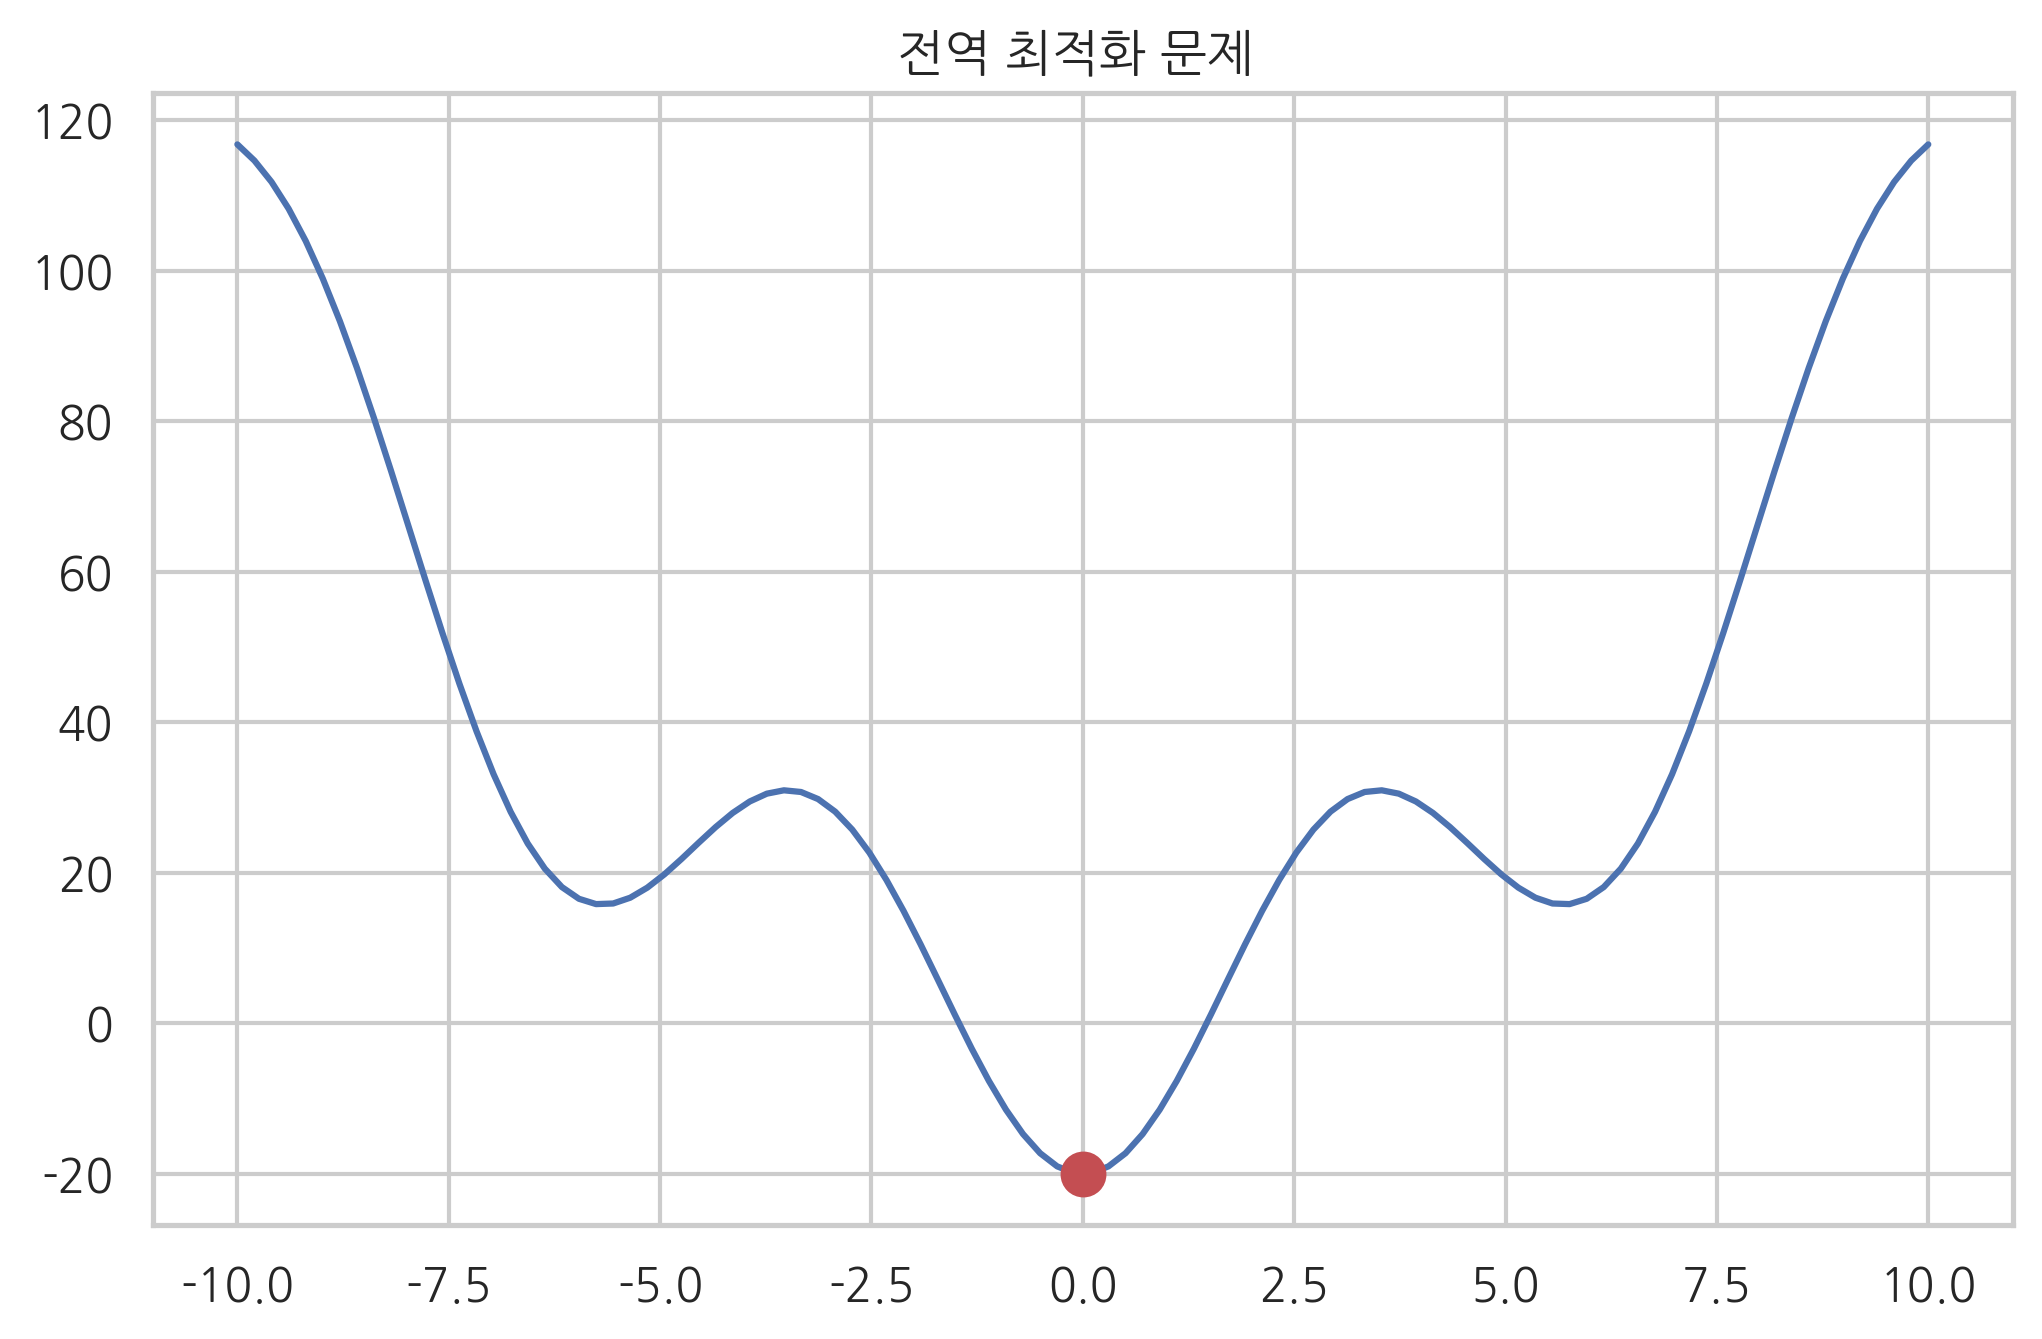

In [75]:
def f_global(x) : 
    return x**2-20*np.cos(x)

xx = np.linspace(-10, 10, 100)
plt.plot(xx, f_global(xx))
plt.title('전역 최적화 문제 ')
plt.plot(0,f_global(0), 'ro',markersize=10)
plt.show()

In [53]:
sp.optimize.minimize(f_global, -6.5)

      fun: 15.791736781359312
 hess_inv: array([[0.05413356]])
      jac: array([-4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-5.67920782])

전역 최적화에 실패했다. 국소 최저점에 수렴했다. 

## 컨벡스 문제로 바꿔서 풀어보자. 

In [63]:
import sympy
x, y = sympy.symbols('x, y')

def f_global(x) : 
    return x**2-20*sympy.cos(x)

sympy.diff(f_global(x))

def d_f_global(x) : 
    return 2*x+20*sympy.sin(x) 

sympy.diff(d_f_global(x))

def dd_f(x) : 
    return 20*np.cos(x)+2 # f_global의 2차 도함수.

## 단변수함수 컨벡스 문제 조건 : 
- 2차 도함수 >= 0 

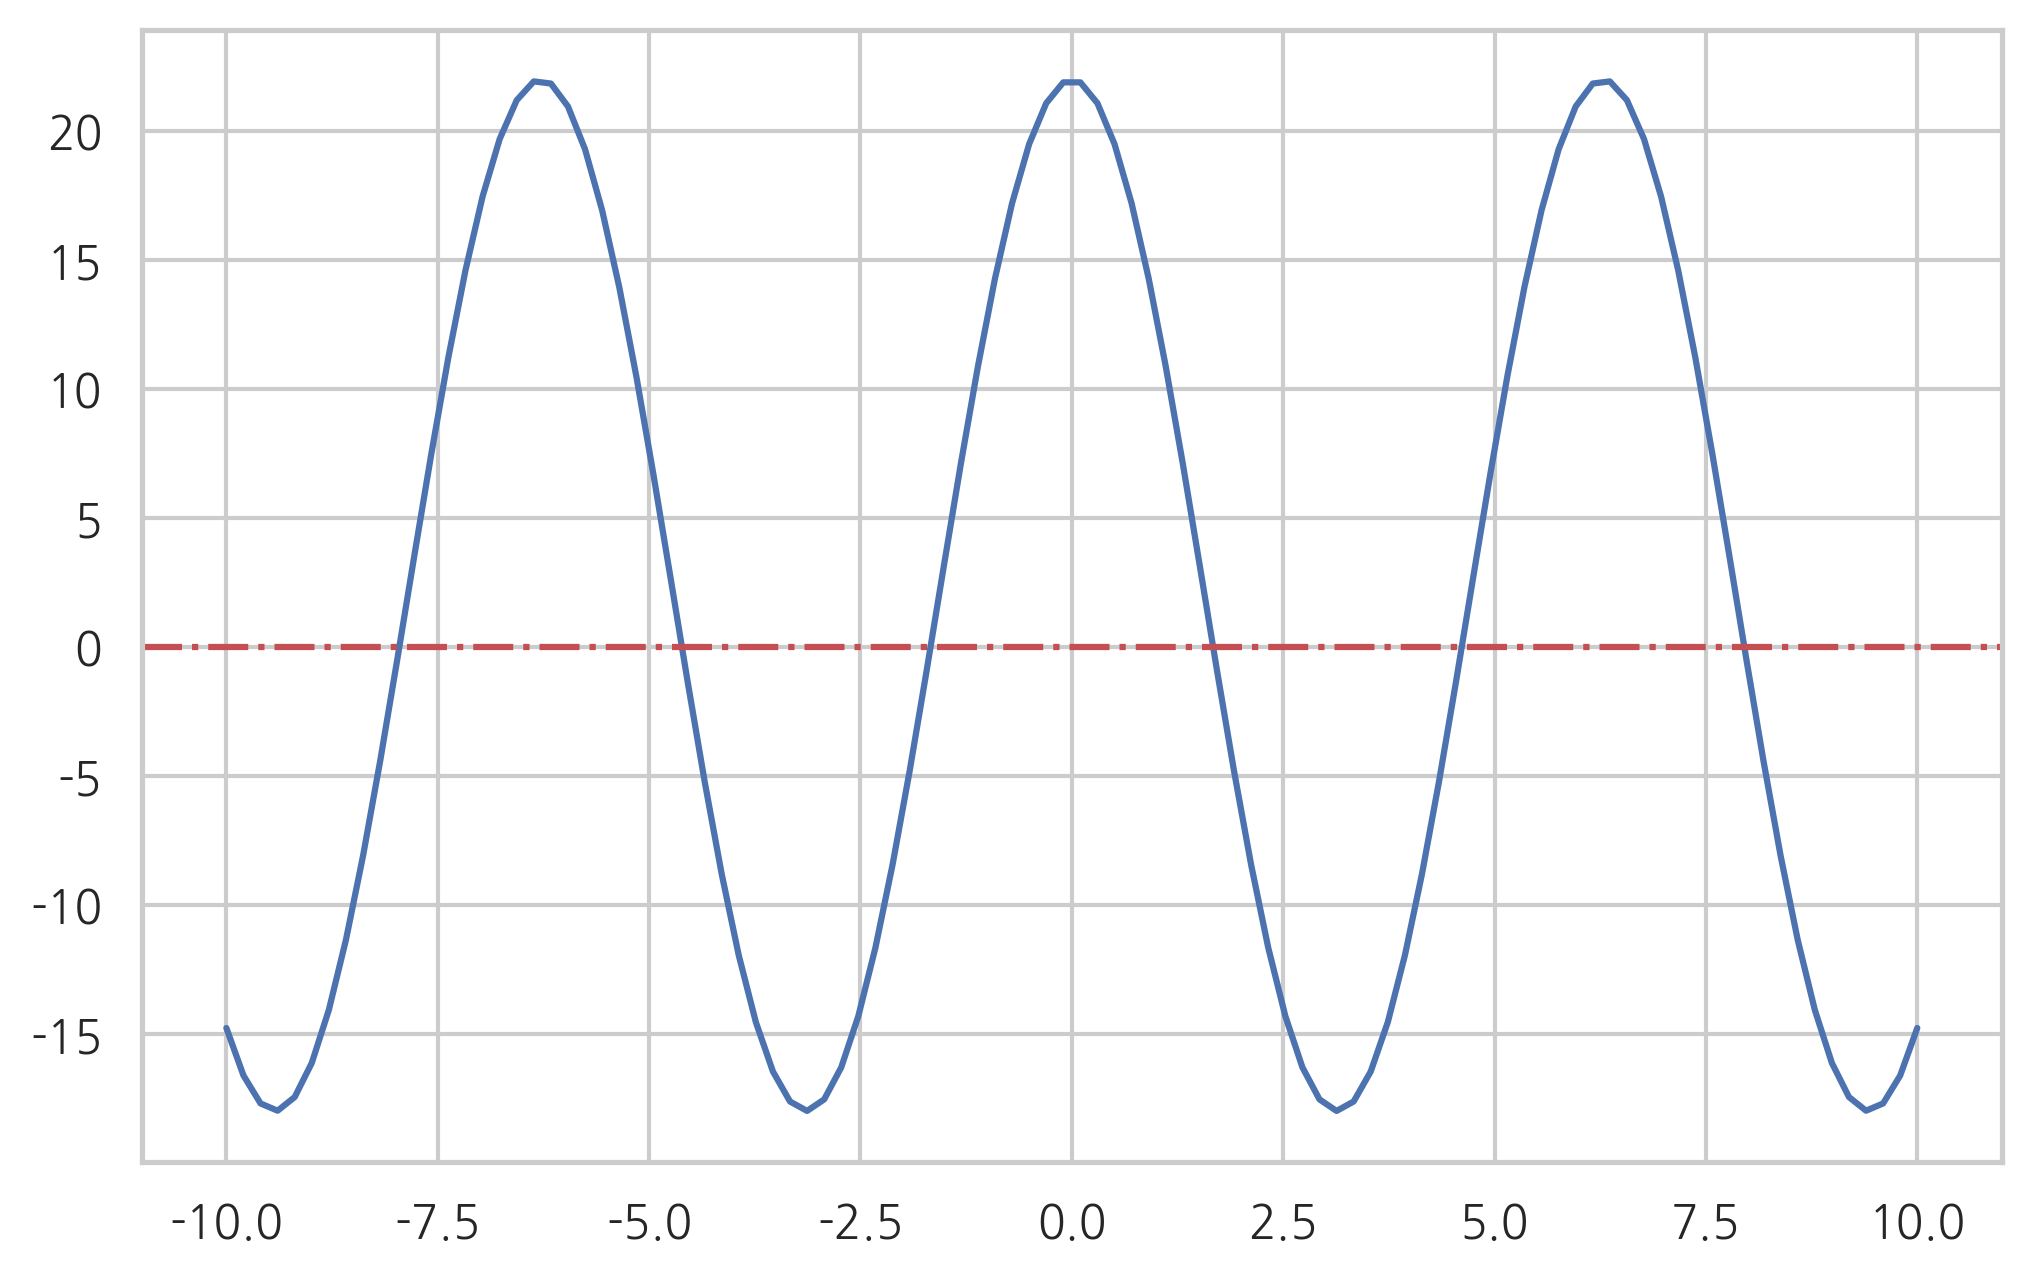

In [70]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, dd_f(xx))
plt.axhline(0, c='r',ls='-.')

## 위 3개 구간에 속한 점 하나씩 뽑아서 최적화 하면 각각 볼록구간의 국소 최저점으로 수렴할 것이다. 

In [81]:
#컨벡스 문제 1. 
con1 = sp.optimize.minimize(f_global, -5)
con1['x'], con1['fun']

(array([-5.67920781]), 15.791736781359308)

In [82]:
#2. 
con2 = sp.optimize.minimize(f_global, 0)
con2['x'], con2['fun']

(array([0.]), -20.0)

In [83]:
#3. 
con3 = sp.optimize.minimize(f_global, 7.5)
con3['x'], con3['fun']

(array([5.67920777]), 15.791736781359312)

## 0이 전역 최적해(최소점), 그리고 그때의 최소 출력이 -20이다. 

## 다변수함수 컨벡스 문제 해결하기 

In [86]:
def f2(x, y) : 
    return (1-x)**2 + 100.0*(y-x**2)**2

def f2_(x) : 
    return (1-x[0])**2 + 100.0*(x[1]-x[0]**2)**2



In [87]:
x, y = sympy.symbols('x,y')

def f2g(x, y) : 
    return np.array((2.0*(x-1)-400.0*x*(y-x**2), 200*(y-x**2)))

In [88]:
sympy.diff(2.0*(x-1)-400.0*x*(y-x**2), x)

1200.0*x**2 - 400.0*y + 2.0

In [89]:
sympy.diff(200*(y-x**2), x)

-400*x

In [90]:
sympy.diff(2.0*(x-1)-400.0*x*(y-x**2), y)

-400.0*x

In [91]:
sympy.diff(200*(y-x**2), y)

200

In [94]:
H = np.array([[1200*x**2-400*y+2, -400*x],
         [-400*x, 200]])

H

array([[1200*x**2 - 400*y + 2, -400*x],
       [-400*x, 200]], dtype=object)

In [104]:
v = np.array([2, 0.3])
result = v.T@H@v
result

4800.0*x**2 - 480.0*x - 1600.0*y + 26.0

In [103]:
(result.subs(x, 2)).subs(y, 0.3)

17786.0000000000

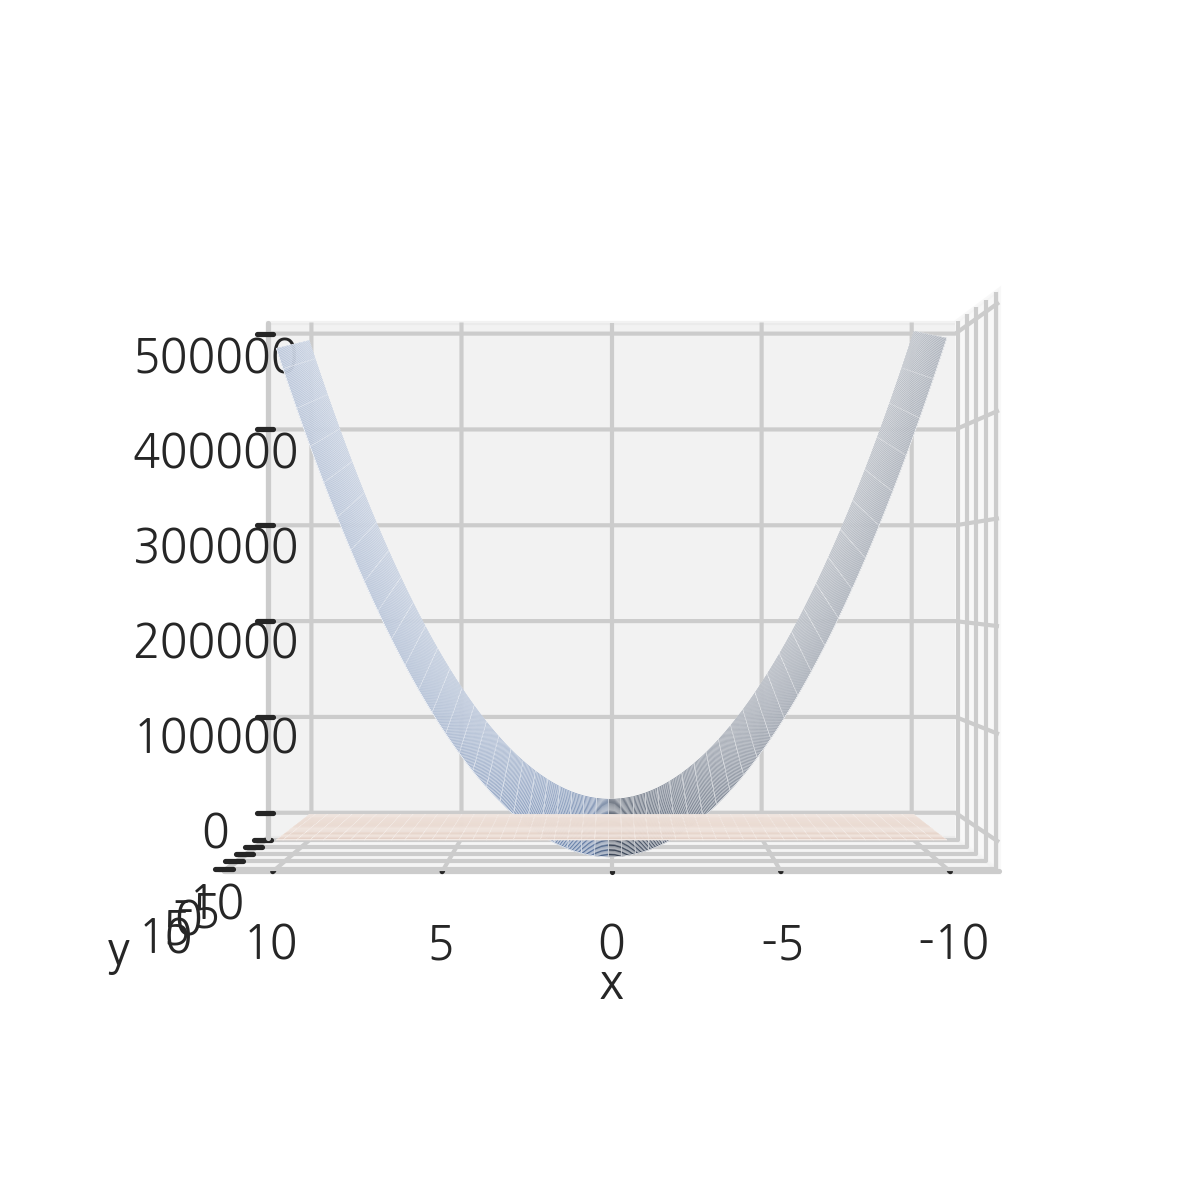

In [132]:
def func(x,y) : 
    return 4800*x**2-480*x-1600*y+26

xx = np.linspace(-10, 10, 100)
yy = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(xx, yy)
Z = func(X, Y)

def func2(x,y) : 
    return 0*x+0*y
Z2 = func2(X,Y)


ax = plt.gca(projection='3d')
ax.plot_surface(X, Y, Z, linewidth=0.1)
ax.plot_surface(X,Y, Z2, linewidth=0.1)
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(0,90)

In [117]:
sp.optimize.minimize(f2_, (5, 5))

      fun: 2.0196233569068553e-11
 hess_inv: array([[0.50238189, 1.00501813],
       [1.00501813, 2.01555023]])
      jac: array([ 3.56122490e-06, -1.79387625e-06])
  message: 'Optimization terminated successfully.'
     nfev: 219
      nit: 55
     njev: 73
   status: 0
  success: True
        x: array([0.99999551, 0.999991  ])

In [119]:
sp.optimize.minimize(f2_, (-2, 5))

      fun: 2.0126083905157365e-11
 hess_inv: array([[0.50165133, 1.00337533],
       [1.00337533, 2.01189887]])
      jac: array([ 6.24414187e-08, -3.90141697e-08])
  message: 'Optimization terminated successfully.'
     nfev: 156
      nit: 42
     njev: 52
   status: 0
  success: True
        x: array([0.99999551, 0.99999102])

In [133]:
H

array([[1200*x**2 - 400*y + 2, -400*x],
       [-400*x, 200]], dtype=object)

In [141]:
R1 = x*(H[0][0]*x+y*(H[1][0]))

In [140]:
R2 = y*(H[0][1]*x+y*(H[1][1]))

In [144]:
((R1+R2).subs(x, 2)).subs(y, 0.3)

17786.0000000000

# 제한조건 있는 최적화 문제 : 라그랑주 승수법으로 푼다. 
- 목적함수 라그랑주 승수 써서 바꿔주자. 
- 등식 제한조건 있는 최적화문제 / 최적화 필요조건 : 그레디언트 벡터 0벡터 만드는 입력
- 부등식 제한조건 있는 최적화 문제 / 최적화 필요조건 : KKT 조건 만족하는 입력 

# 등식제한조건 있는 최적화 문제 계산하기 

fmin_slsqp() 명령

In [148]:
def f(x) : 
    return x**2+x*3

def cons(x) : 
    return x+3

sp.optimize.fmin_slsqp(f, 3, eqcons=[cons])

Optimization terminated successfully    (Exit mode 0)
            Current function value: [0.]
            Iterations: 2
            Function evaluations: 4
            Gradient evaluations: 2


array([-3.])

In [150]:
def f1array(x) : 
    return x[0]**2+x[1]**2

def eq_constraint(x) : 
    return x[0]+x[1]-1

x0 = np.array([1,1])
sp.optimize.fmin_slsqp(f1array,x0, ieqcons=[eq_constraint] )

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4999999999999942
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2


array([0.5, 0.5])

# 부등식 제한조건 있는 최적화 문제 해결하기 
- 제한조건 있는 최적화 문제는 fmin_slsqp() 써서 해결하면 된다. 

# 부등식 제한조건 문제는 ieqcons= 인자에 제한조건 넣자. 
- 부등호 방향은 원래 <= 에서 >= 로 바꿔줘야 한다. 

In [43]:
def f2(x) : 
    return np.sqrt((x[0]-4)**2+(x[1]-2)**2)

k = 1
def ieq_constraint(x) : 
    return np.atleast_1d(k-np.sum(np.abs(x)))


x0 = np.array([0,0])

sp.optimize.fmin_slsqp(f2, x0, ieqcons=[ieq_constraint])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.6055512804550336
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11


array([9.99999982e-01, 1.79954011e-08])

# 등식 제한조건 문제는 eqcons= 인자에 등식 제한조건 넣자. 

In [48]:
def f2(x) : 
    return np.sqrt((x[0]-4)**2+(x[1]-2)**2)

k = 1
def ieq_constraint(x) : 
    return np.atleast_1d(k-np.sum(np.abs(x)))


def eq_constraint(x) : 
    return 2*x[0]+3+x[1]


x0 = np.array([0,0])

sp.optimize.fmin_slsqp(f2, x0, eqcons=[eq_constraint])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.813776741499454
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2


array([-1.2, -0.6])

In [30]:
sp.optimize.fmin_slsqp?

# 등식 제한조건 
eqcons : list, optional
    A list of functions of length n such that
    eqcons[j](x,*args) == 0.0 in a successfully optimized
    problem.

# 부등식 제한조건 
ieqcons : list, optional
    A list of functions of length n such that
    ieqcons[j](x,*args) >= 0.0 in a successfully optimized
    problem.

# 둘 동시에 걸 수도 있다. 